In [39]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from hierarchSIR.utils import get_transmission_coefficient_timeseries

In [40]:
samples_xr_lst = [xr.open_dataset("exclude_None_SAMPLES_SIR1S.nc"), xr.open_dataset("exclude_None_SAMPLES_SIR2S.nc"), xr.open_dataset("exclude_None_SAMPLES_SIR3S.nc") ]

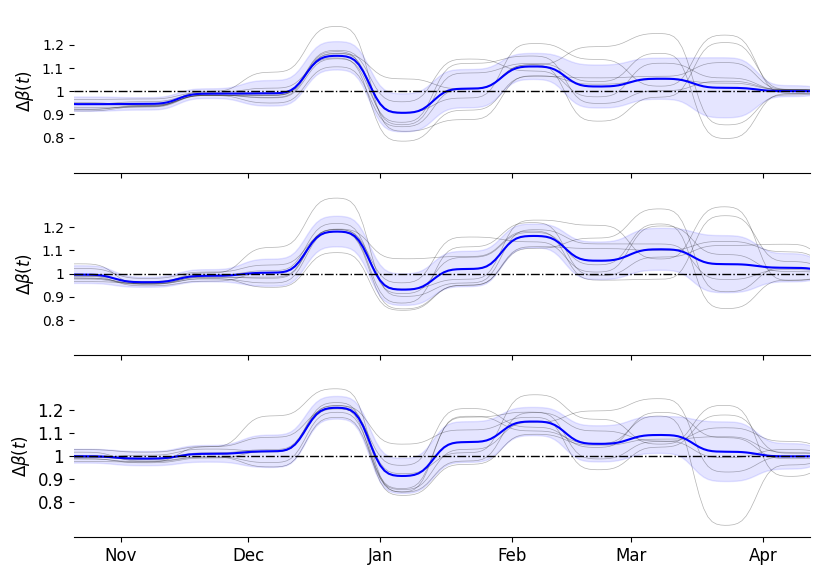

In [41]:
fig,ax=plt.subplots(nrows=len(samples_xr_lst), figsize=(8.3, 11.7/2), sharex=True)
for i, samples_xr in enumerate(samples_xr_lst):
    ### compute modifier tranjectory of every season and plot
    for _, season in enumerate(samples_xr.coords['season']):
        x = pd.date_range(start=datetime(2024,10,14)-timedelta(days=30), end=datetime(2025,4,15)+timedelta(days=30), freq='D')
        y = get_transmission_coefficient_timeseries(samples_xr['delta_beta_temporal'].median(dim=['iteration', 'chain']).sel(season=season).values)
        ax[i].plot(x, y+1, color='black', linewidth=0.5, alpha=0.3)
    ### visualise hyperdistribution
    ll = get_transmission_coefficient_timeseries(samples_xr['delta_beta_temporal_mu'].median(dim=['iteration', 'chain']).values - samples_xr['delta_beta_temporal_sigma'].median(dim=['iteration', 'chain']).values)
    y = get_transmission_coefficient_timeseries(samples_xr['delta_beta_temporal_mu'].median(dim=['iteration', 'chain']).values)
    ul = get_transmission_coefficient_timeseries(samples_xr['delta_beta_temporal_mu'].median(dim=['iteration', 'chain']).values + samples_xr['delta_beta_temporal_sigma'].median(dim=['iteration', 'chain']).values)
    ax[i].plot(x, y+1, color='blue', alpha=1)
    ax[i].fill_between(x, ll+1, ul+1, color='blue', alpha=0.1)
    ax[i].axhline(y=1, color='black', linewidth=1, linestyle='-.')
    ## do everytime

    ## axis formatting
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax[i].set_yticks([0.8, 0.9, 1, 1.1, 1.2])
    ax[i].set_yticklabels([0.8, 0.9, 1, 1.1, 1.2])
    ax[i].set_ylabel(r'$\Delta \beta(t)$', fontsize=12)
    ax[i].set_ylim([0.65, 1.35])
    ax[i].set_xlim([datetime(2024, 10, 21), datetime(2025, 4, 12)])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('modifiers_hyperdistribution.pdf')
plt.show()
plt.close()